# Exercise 02

## Time Series Analysis

### Integrantes
    Oscar Mauricio Cepeda Valero
    Carlos Andres Paez Rojas
    Daniel Camilo Rojas Arcila

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts
# Todo lo identado va dentro de la función, y por eso ahí funciona bien

In [95]:
# Creación como series del arr (rho), pv (p value), t (nivel de significancia)
arr=pd.Series(np.arange(0,1.01,0.01))
pv=pd.Series(np.arange(0,1.01,0.01))
t = pd.Series(np.random.rand(101)) 
t[0] = 0.05

In [ ]:
# Redefiniendo o estableciendo el nivel de significancia de 0.05
for i in range(1, arr.shape[0]):    
    t[i] = 0.05

In [ ]:
for i in range(0, pv.shape[0]):
    tsr = ts(rho=arr[i])
    result = adfuller(tsr)
    pv[i] = result[1]

A continucaicón gráfico pvalue, H0: Serie no estacionaria, vemos que no rechazo H0 cuando pvalue supera 0.05

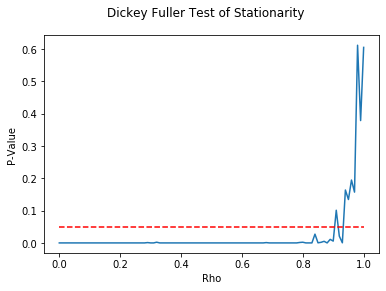

In [99]:
# Gráfica del del p-value vs rho dodne se puede observar cuando supera el nivel de significancia
plt.plot(arr, pv, arr, t, 'r--')
plt.xlabel('Rho') # arr
plt.ylabel('P-Value')
plt.suptitle('Dickey Fuller Test of Stationarity')
plt.show()

- El siguiente Dataframe representa los valores de Rho para los cuales la serie de datos no es estacionaria, con sus respectivos p-values de la prueba Dickey Fuller. El valor de rho a partir del cual deja de ser estacionaria la series es el primero de la tabla siguiente

In [100]:
df = pd.concat([arr, pv], axis=1)
df.columns = ['rho', 'pvalue']
df = df.loc[df['pvalue'] > 0.05]
df

,rho,pvalue
91,0.91,0.101123
94,0.94,0.163765
95,0.95,0.134368
96,0.96,0.194592
97,0.97,0.157216
98,0.98,0.611873
99,0.99,0.378747
100,1.00,0.605206


# 02.2 Download and explore two series from google trends

In [107]:
df1 = pd.read_csv('../EjerciciosModelosAvanzados1/Covid.csv', skiprows=1)
df2 = pd.read_csv('../EjerciciosModelosAvanzados1/Cuarentena.csv', skiprows=1)
df1.head()

,Day,Covid: (Colombia)
0,2020-03-17,66
1,2020-03-18,66
2,2020-03-19,60
3,2020-03-20,71
4,2020-03-21,96


In [106]:
df2.head()

,Day,Cuarentena: (Colombia)
0,2020-03-17,15
1,2020-03-18,20
2,2020-03-19,19
3,2020-03-20,27
4,2020-03-21,100


In [ ]:
df1.columns = ['date', 'Covid']
df2.columns = ['date', 'Cuarentena']
df1.date = pd.to_datetime(df1.date)
df2.date = pd.to_datetime(df2.date)
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)

df1.head()

In [109]:
df2.head()

,Cuarentena
date,
2020-03-17,15
2020-03-18,20
2020-03-19,19
2020-03-20,27
2020-03-21,100


In [110]:
df = pd.concat([df1, df2], axis=1)
df.head()

,Covid,Cuarentena
date,,
2020-03-17,66,15
2020-03-18,66,20
2020-03-19,60,19
2020-03-20,71,27
2020-03-21,96,100


### 1. Graficando los datos de las observaciones de Covid y Cuarentena

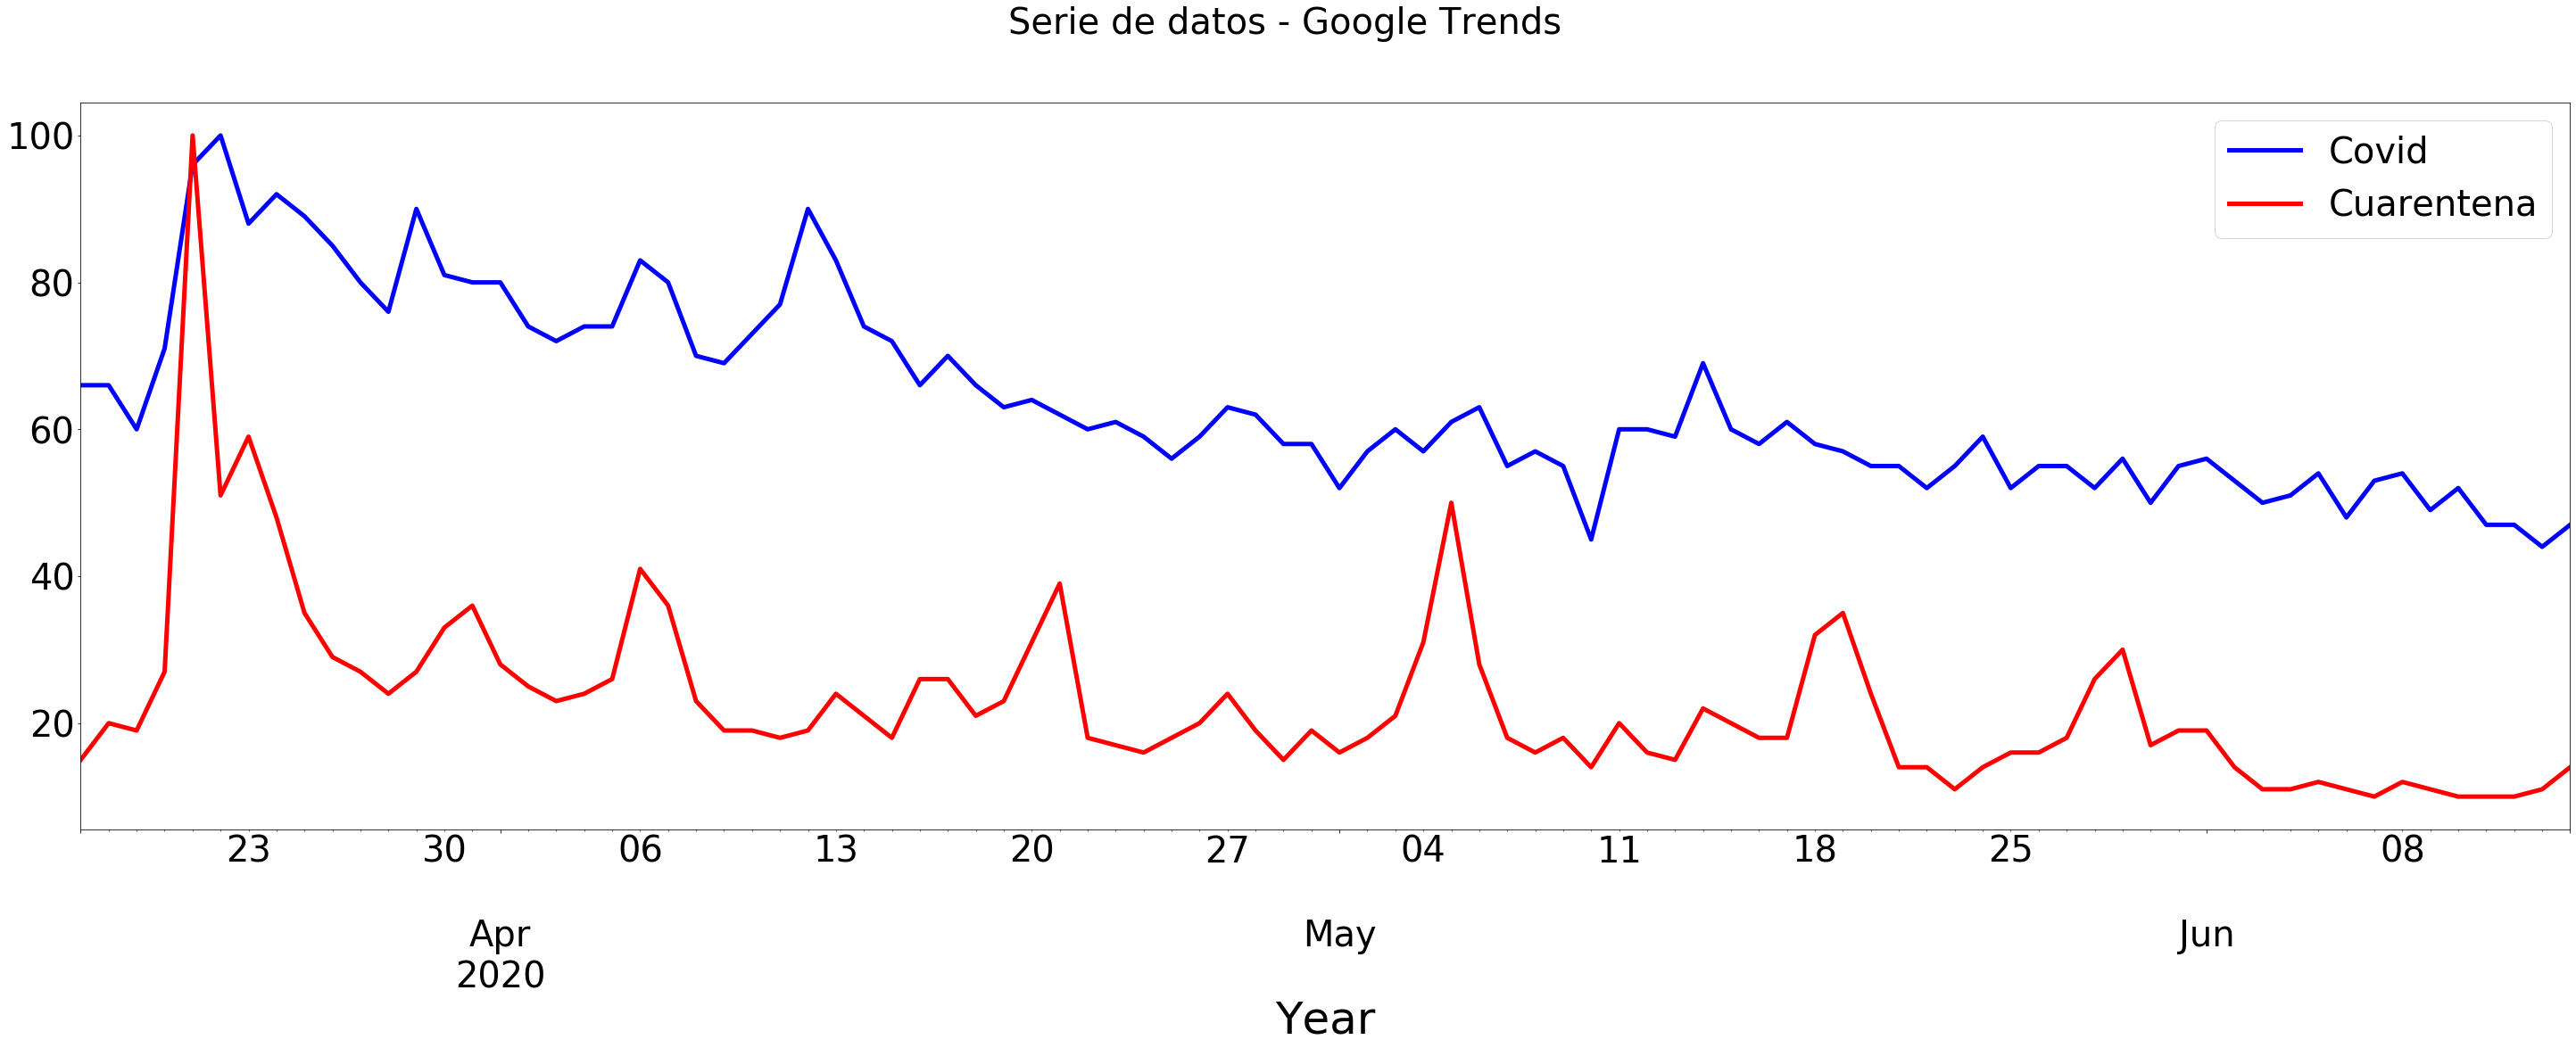

In [122]:
df.plot(figsize=(50,15), linewidth=5, fontsize=40, color=('b', 'r'))
plt.xlabel('Year', fontsize=50)
plt.suptitle('Serie de datos - Google Trends', fontsize=40)
plt.legend(prop={'size':40});

## 2. Analizando la tendencia
Se puede observar de la gráfica anterior de los datos, que existe una estacionalidad o unos picos cada dos semanas (15 días) particularmente en las observaciones de Cuarentena. 
En las observaciones de COVID no parece haber un patron estacional claro. 

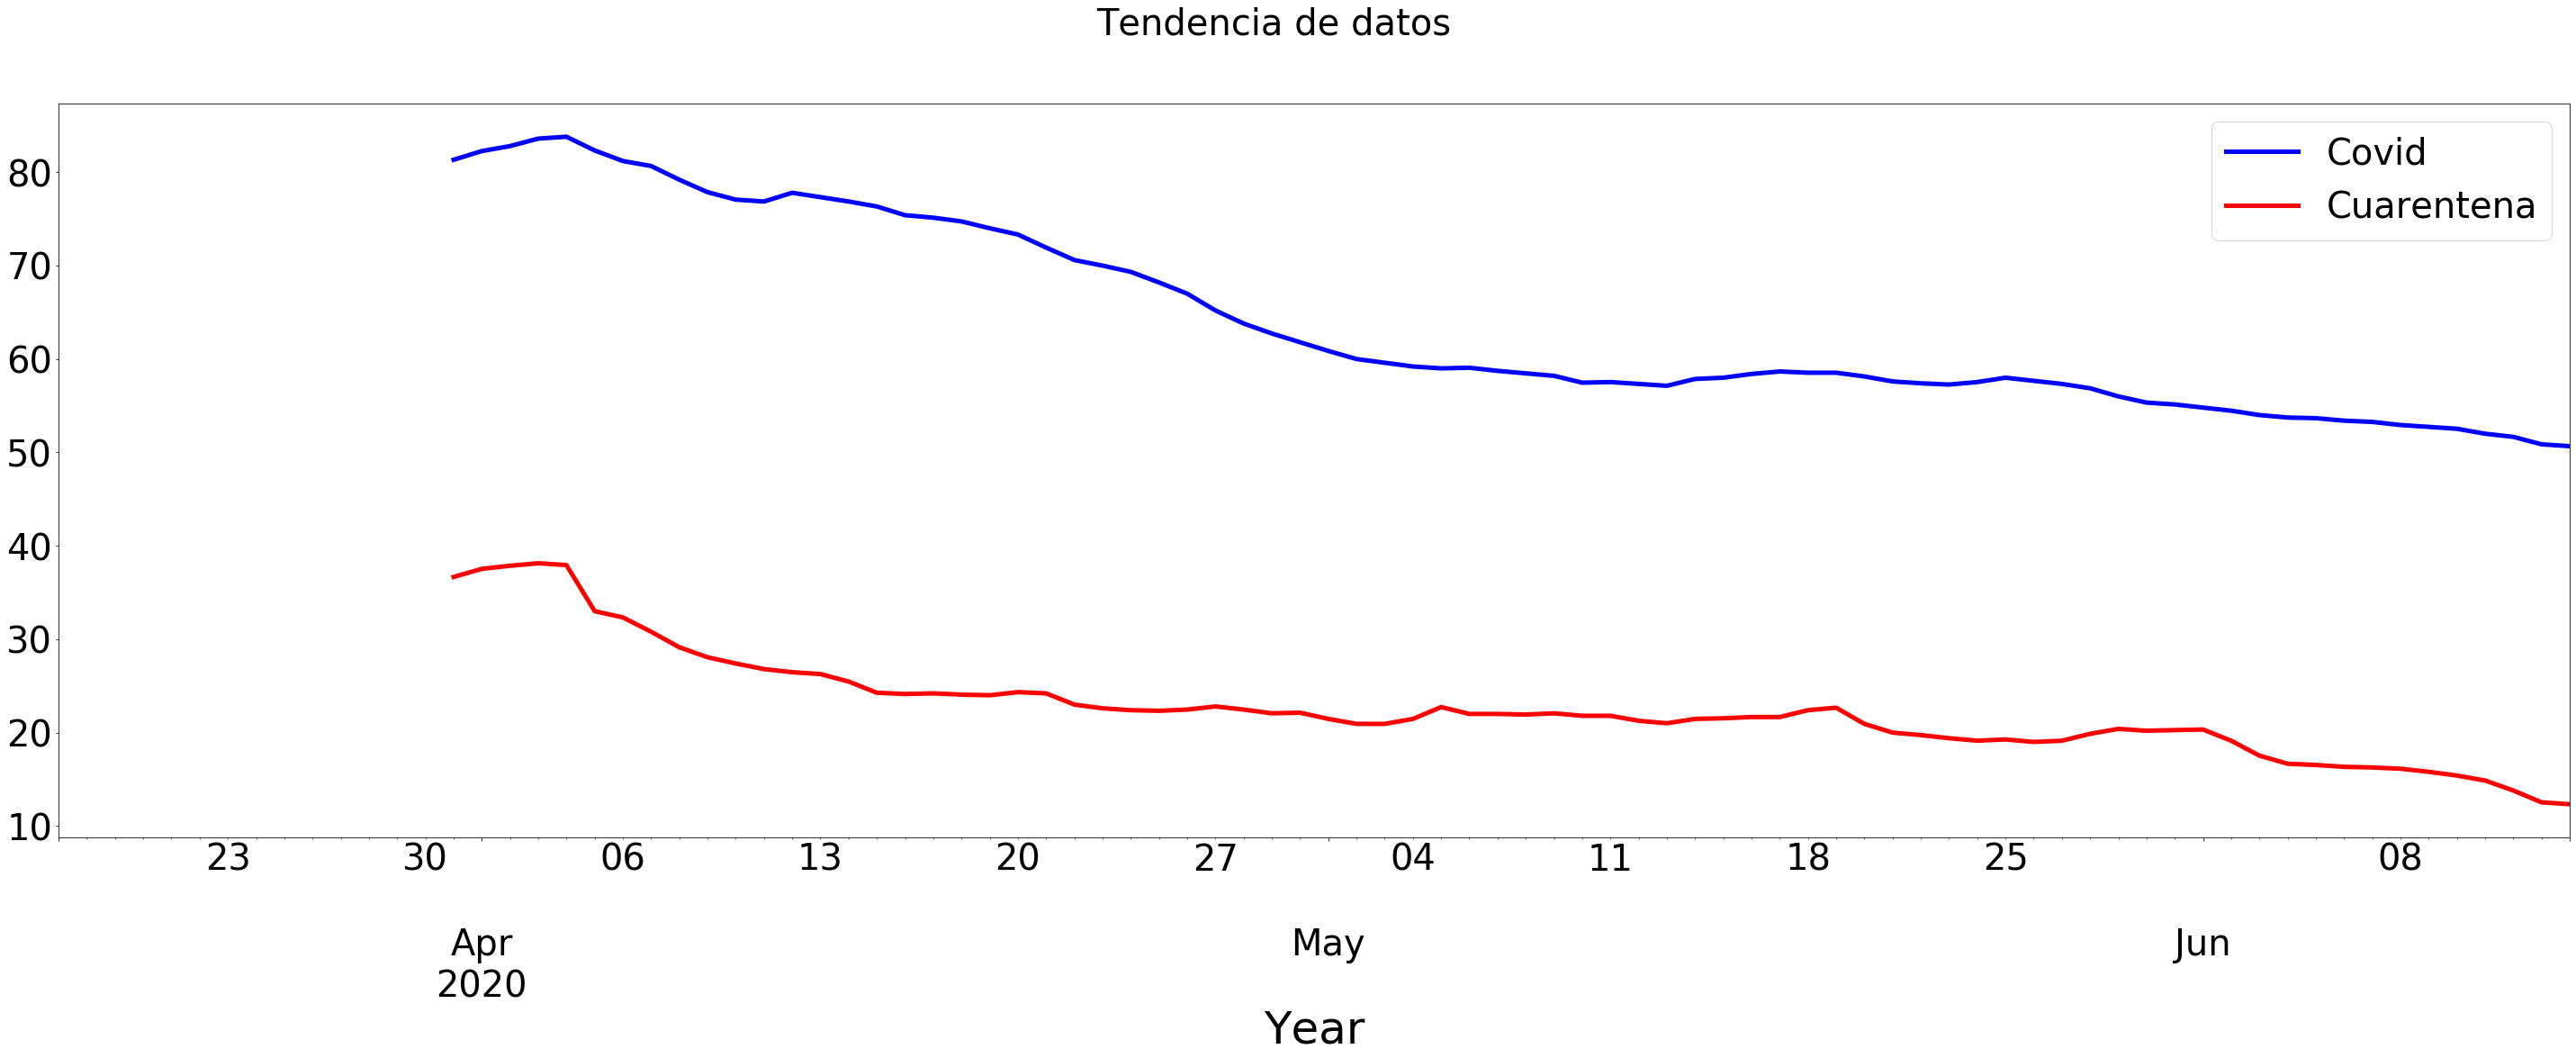

In [127]:
df[['Covid', 'Cuarentena']].rolling(15).mean().plot(figsize=(50,15), linewidth=5, fontsize=40, color=('b', 'r'))
plt.xlabel('Year', fontsize=50)
plt.suptitle('Tendencia de datos', fontsize=40)
plt.legend(prop={'size':40});

## 3. Analísis de Estacionalidad

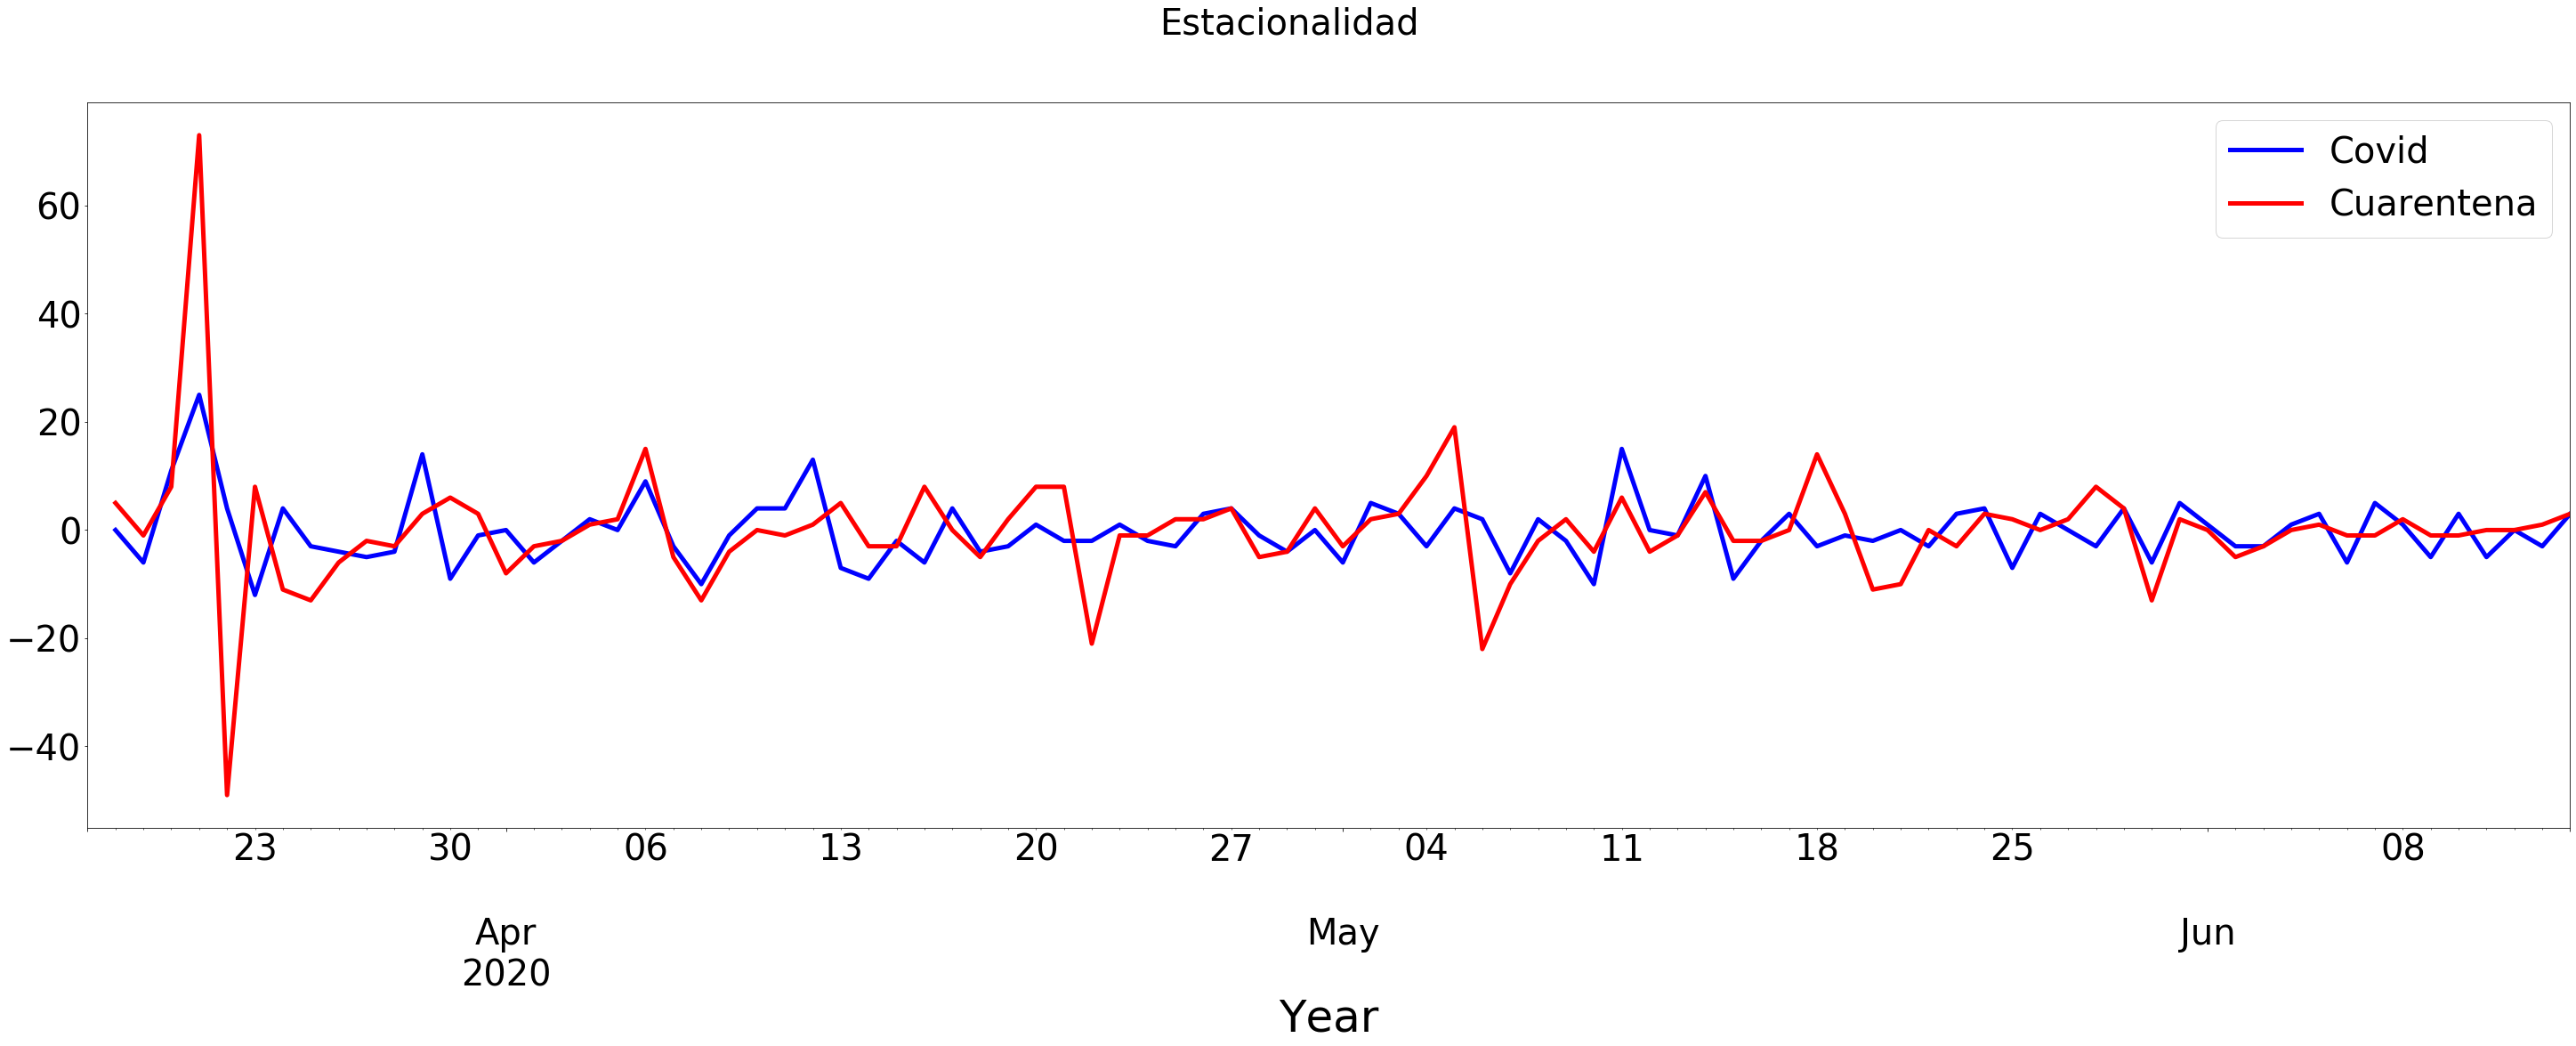

In [129]:
df.diff().plot(figsize=(50,15), linewidth=5, fontsize=40, color=('b', 'r'))
plt.xlabel('Year', fontsize=50)
plt.suptitle('Estacionalidad', fontsize=40)
plt.legend(prop={'size':40});

## 4. Realización del TEST de estacionaridad Serie de obs Covid
Dado que el valor p>0.05 no rechazo la hiótesis nula de que la series No es estacionaria, por tanto se concluye que la serie no es estacionaria

In [131]:
result = adfuller(df['Covid'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.140426
p-value: 0.698684
Critical Values:
	1%: -3.510
	5%: -2.896
	10%: -2.585


## 5. Realización del TEST de estacionaridad Serie de obs Covid  eliminando la tendencia de los datos
Dado que el valor p=0, la serie si es estacionaria, lo que significa que al transformarla restandole la observación anterior (tendencia) se pudo lograr cumplir esta supuesto.

In [133]:
result = adfuller(df['Covid'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.393668
p-value: 0.000000
Critical Values:
	1%: -3.510
	5%: -2.896
	10%: -2.585


## 6. Realización del TEST de estacionaridad Serie de obs Cuarentena
Por el valor p la prueba nos dice que es estacionaria, sin embargo pudimos notar una leve tendencia decreciente en la gráfica que indica lo no estacionaridad. 

In [135]:
result = adfuller(df['Cuarentena'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.736394
p-value: 0.003629
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585


## 7.  Realización del TEST de estacionaridad Serie de obs Cuarentena  eliminando la tendencia de los datos
Por el valor p la prueba nos dice que es estacionaria, sin embargo pudimos notar una leve tendencia decreciente en la gráfica que indica lo no estacionaridad. 

In [137]:
result = adfuller(df['Cuarentena'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.040745
p-value: 0.000000
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


## 7.  Análisis de Autocorrelación

In [140]:
df.corr()

,Covid,Cuarentena
Covid,1.000000,0.671391
Cuarentena,0.671391,1.000000


In [141]:
df.diff().corr()

,Covid,Cuarentena
Covid,1.000000,0.407763
Cuarentena,0.407763,1.000000


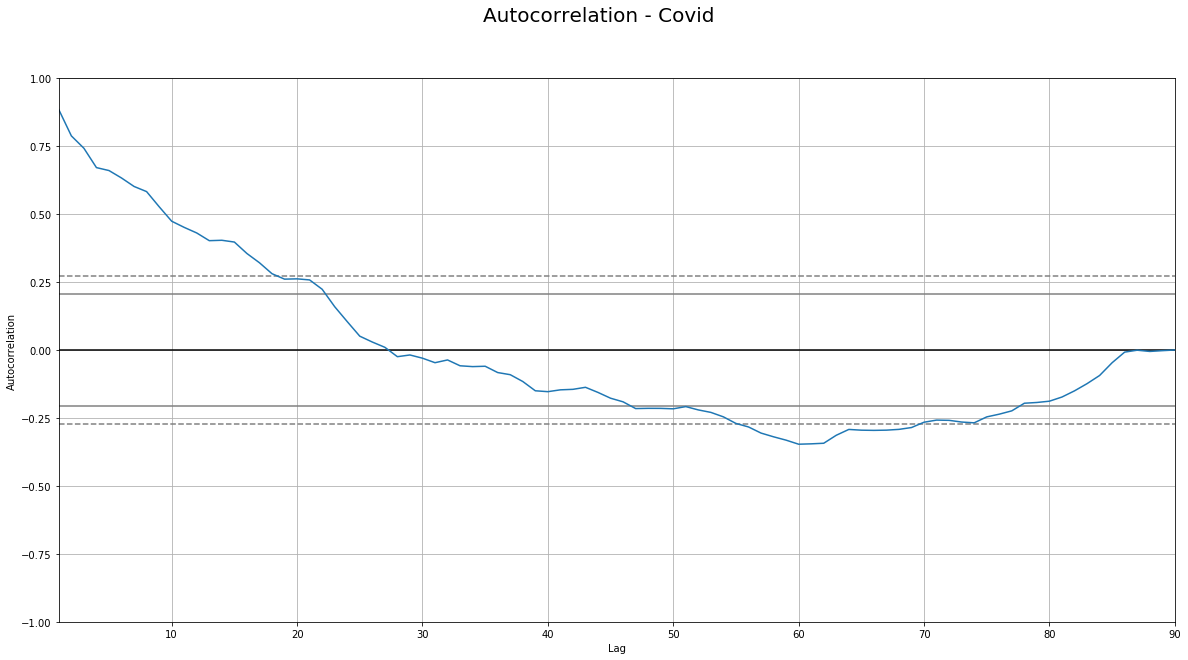

In [148]:
plt.figure(figsize=(20,10), linewidth=5)
pd.plotting.autocorrelation_plot(df['Covid'])
plt.suptitle('Autocorrelation - Covid', fontsize=20);

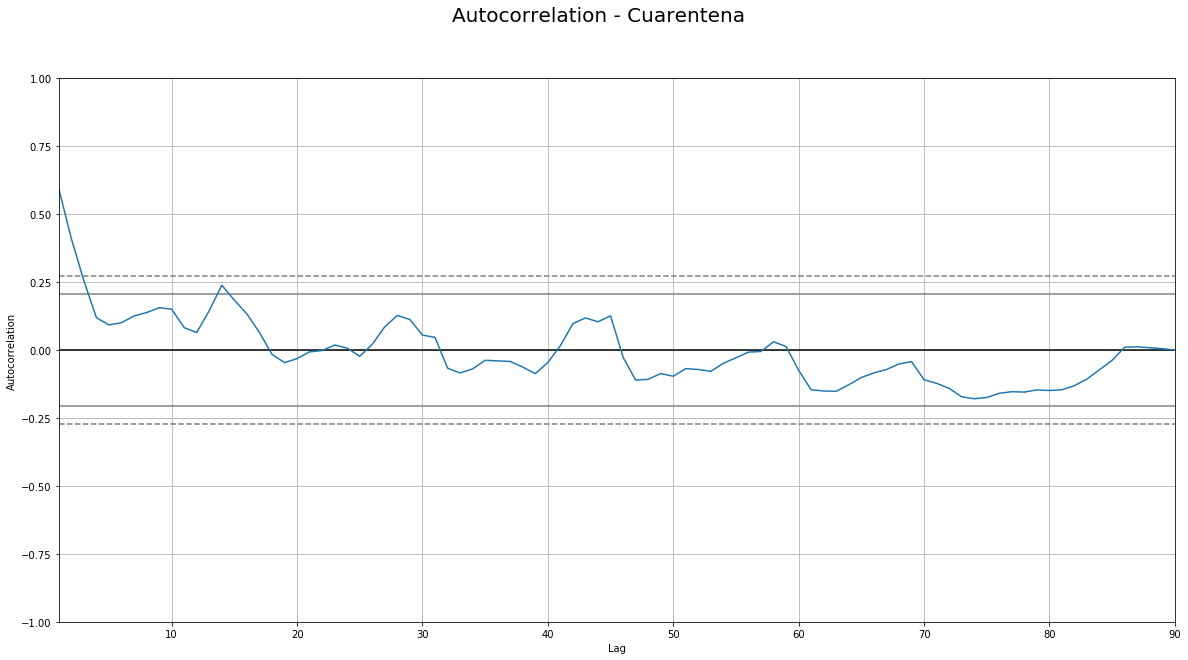

In [144]:
plt.figure(figsize=(20,10), linewidth=5)
pd.plotting.autocorrelation_plot(df['Cuarentena'])
plt.suptitle('Autocorrelation - Cuarentena', fontsize=20);